# Bayesian Regression

### by Neil Lawrence (2015)


$$\newcommand{\inputScalar}{x}
\newcommand{\lengthScale}{\ell}
\newcommand{\mappingVector}{\mathbf{w}}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\zerosVector}{\mathbf{0}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\dataStd}{\sigma}
\newcommand{\dataScalar}{y}
\newcommand{\dataVector}{\mathbf{y}}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\mathbf{\epsilon}}
\newcommand{\noiseMatrix}{\mathbf{\Epsilon}}
\newcommand{\inputVector}{\mathbf{x}}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\basisMatrix}{\mathbf{\Phi}}
\newcommand{\basisVector}{\mathbf{\phi}}
\newcommand{\basisScalar}{\phi}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\numData}{n}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingFunctionScalar}{f}
\newcommand{\mappingFunctionVector}{\mathbf{f}}
\newcommand{\meanVector}{\boldsymbol{\mu}}
\newcommand{\meanScalar}{\mu}$$

### Overdetermined Systems

At the beginning of this course, we motivated the introduction of probability by considering systems where there were more observations than unknowns. In particular we thought about the simple fitting of the gradient and an offset of a line,

$$ y= mx +c $$

and what happens if we have three pairs of observations of $x$ and $y$, $\{x_i, y_i\}_{i=1}^3$. We solved this issue by introducing a type of [slack variable](http://en.wikipedia.org/wiki/Slack_variable), $\epsilon_i$, known as noise, such that for each observation we had the equation,

$$y_i = mx_i + c + \epsilon_i.$$

### Underdetermined System

In contrast, today we'd like to consider the situation where you have more parameters than data in your simultaneous equation. So we have an *underdetermined* system. In fact this set up is in some sense *easier* to solve, because we don't need to think about introducing a slack variable (although it might make a lot of sense from a *modelling* perspective to do so).

In the overdetermined system, we resolved the problem by introducing slack variables, $\epsilon_i$, which needed to be estimated for each point. The slack variable represented the difference between our actual prediction and the true observation. This is known as the *residual*. By introducing the slack variable we now have an additional $n$ variables to estimate, one for each data point, $\{\epsilon_i\}$. This actually turns the overdetermined system into an underdetermined system. Introduction of $n$ variables, plus the original $m$ and $c$ gives us $n+2$ parameters to be estimated from $n$ observations, which actually makes the system *underdetermined*. However, we then made a probabilistic assumption about the slack variables, we assumed that the slack variables were distributed according to a probability density. And for the moment we have been assuming that density was the Gaussian,

$$\epsilon_i \sim \mathcal{N}(0, \sigma^2),$$

with zero mean and variance $\sigma^2$. 

#### Sum of Squares and Probability

In the overdetermined system we introduced a new set of slack variables, $\{\epsilon_i\}_{i=1}^n$, on top of our parameters $m$ and $c$. We dealt with the variables by placing a probability distribution over them. This gives rise to the likelihood and for the case of Gaussian distributed variables, it gives rise to the sum of squares error. It was Gauss who first made this connection in his volume on "Theoria Motus Corprum Coelestium" (written in Latin)

In [18]:
import pods
pods.notebook.display_google_book(id='ORUOAAAAQAAJ', page='213')

The relevant section roughly translates as

... It is clear, that for the product $\Omega = h^\mu \pi ^{-frac{1}{2}\mu} e^{-hh(vv + v^\prime v^\prime + v^{\prime\prime} v^{\prime\prime} + \dots)}$ to be maximised the sum $vv + v ^\prime v^\prime + v^{\prime\prime} v^{\prime\prime} + \text{etc}.$ ought to be minimized. *Therefore, the most probable values of the unknown quantities $p , q, r , s \text{etc}.$, should be that in which the sum of the squares of the differences between the functions $V, V^\prime, V^{\prime\prime} \text{etc}$, and the observed values is minimized*, for all observations of the same degree of precision is presumed.

It's on the strength of this paragraph that the density is known as the Gaussian, despite the fact that four pages later Gauss credits the necessary integral for the density to Laplace, and it was also Laplace that did a lot of the original work on dealing with these errors through probability. [Stephen Stigler's book on the measurement of uncertainty before 1900](http://www.hup.harvard.edu/catalog.php?isbn=9780674403413) has a nice chapter on this.

In [19]:
pods.notebook.display_google_book(id='ORUOAAAAQAAJ', page='217')

where the crediting to the Laplace is about halfway through the last paragraph. This book was published in 1809, four years after Legendre presented least squares in an appendix to one of his chapters on the orbit of comets. Gauss goes on to make a claim for priority on the method on page 221 (towards the end of the first paragraph ...).

In [20]:
pods.notebook.display_google_book(id='ORUOAAAAQAAJ', page='221')

## A Philosophical Dispute: Probabilistic Treatment of Parameters?

The follow up question is whether we can do the same thing with the parameters. If we have two parameters and only one unknown can we place a probability distribution over the parameters, as we did with the slack variables? The answer is yes, and from a philosophical perspective placing a probability distribution over the *parameters* is known as the *Bayesian* approach. This is because Thomas Bayes, in a [1763 essay](http://en.wikipedia.org/wiki/An_Essay_towards_solving_a_Problem_in_the_Doctrine_of_Chances) published at the Royal Society introduced the [Bernoulli distribution](http://en.wikipedia.org/wiki/Bernoulli_distribution) with a probabilistic interpretation for the *parameters*. Later statisticians such as [Ronald Fisher](http://en.wikipedia.org/wiki/Ronald_Fisher) objected to the use of probability distributions for *parameters*, and so in an effort to discredit the approach the referred to it as Bayesian. However, the earliest practioners of modelling, such as Laplace applied the approach as the most natural thing to do for dealing with unknowns (whether they were parameters or variables). Unfortunately, this dispute led to a split in the modelling community that still has echoes today. It is known as the Bayesian vs Frequentist controversy. From my own perspective, I think that it is a false dichotomy, and that the two approaches are actually complementary. My own research focus is on *modelling* and in that context, the use of probability is vital. For frequenstist statisticians, such as Fisher, the emphasis was on the value of the evidence in the data for a particular hypothesis. This is known as hypothesis testing. The two approaches can be unified because one of the most important approaches to hypothesis testing is to [compute the ratio of the likelihoods](http://en.wikipedia.org/wiki/Likelihood-ratio_test), and the result of applying a probability distribution to the parameters is merely to arrive at a different form of the likelihood.

## The Bayesian Approach

The aim of this notebook is to study Bayesian approaches to regression. In the Bayesian approach we define a *prior* density over our parameters, $m$ and $c$ or more generally $\mathbf{w}$. This prior distribution gives us a range of expected values for our parameter *before* we have seen the data. The object in Bayesian inference is to then compute the *posterior* density which is the effect on the density of having observed the data. In standard probability notation we write the prior distribution as,
$$p(\mathbf{w}),$$
so it is the *marginal* distribution for the parameters, i.e. the distribution we have for the parameters without any knowledge about the data. The posterior distribution is written as,
$$p(\mathbf{w}|\mathbf{y}, \mathbf{X}).$$
So the posterior distribution is the *conditional* distribution for the parameters given the data (which in this case consists of pairs of observations including response variables (or targets), $y_i$, and covariates (or inputs) $\mathbf{x}_i$. Where here we are allowing the inputs to be multivariate. 

The posterior is recovered from the prior using *Bayes' rule*. Which is simply a rewriting of the product rule. We can recover Bayes rule as follows. The product rule of probability tells us that the joint distribution is given as the product of the conditional and the marginal. Dropping the inputs from our conditioning for the moment we have,
$$p(\mathbf{w}, \mathbf{y})=p(\mathbf{y}|\mathbf{w})p(\mathbf{w}),$$
where we see we have related the joint density to the prior density and the *likelihood* from our previous investigation of regression,
$$p(\mathbf{y}|\mathbf{w}) = \prod_{i=1}^n\mathcal{N}(y_i | \mathbf{w}^\top \mathbf{x}_i, \sigma^2)$$
which arises from the assumption that our observation is given by
$$y_i = \mathbf{w}^\top \mathbf{x}_i + \epsilon_i.$$
In other words this is the Gaussian likelihood we have been fitting by minimizing the sum of squares. Have a look at the session on multivariate regression as a reminder.

We've introduce the likelihood, but we don't have relationship with the posterior. However, the product rule can also be written in the following way
$$p(\mathbf{w}, \mathbf{y}) = p(\mathbf{w}|\mathbf{y})p(\mathbf{y}),$$
where here we have simply used the opposite conditioning. We've already introduced the *posterior* density above. This is the density that represents our belief about the parameters *after* observing the data. This is combined with the *marginal likelihood*, sometimes also known as the evidence. It is the marginal likelihood, because it is the original likelihood of the data with the parameters marginalised, $p(\mathbf{y})$. Here it's conditioned on nothing, but in practice you should always remember that everything here is conditioned on things like model choice: which set of basis functions. Because it's a regression problem, it's also conditioned on the inputs. Using the equality between the two different forms of the joint density we recover
$$p(\mathbf{w}|\mathbf{y}) = \frac{p(\mathbf{y}|\mathbf{w})p(\mathbf{w})}{p(\mathbf{y})}$$
where we divided both sides by $p(\mathbf{y})$ to recover this result. Let's re-introduce the conditioning on the input locations (or covariates), $\mathbf{X}$ to write the full form of Bayes' rule for the regression problem. 
$$p(\mathbf{w}|\mathbf{y}, \mathbf{X}) = \frac{p(\mathbf{y}|\mathbf{w}, \mathbf{X})p(\mathbf{w})}{p(\mathbf{y}|\mathbf{X})}$$
where the posterior density for the parameters given the data is $p(\mathbf{w}|\mathbf{y}, \mathbf{X})$, the marginal likelihood is $p(\mathbf{y}|\mathbf{X})$, the prior density is $p(\mathbf{w})$ and our original regression likelihood is given by $p(\mathbf{y}|\mathbf{w}, \mathbf{X})$. It turns out that to compute the posterior the only things we need to do are define the prior and the likelihood. The other term on the right hand side can be computed by *the sum rule*. It is one of the key equations of Bayesian inference, the expectation of the likelihood under the prior, this process is known as marginalisation,
$$
p(\mathbf{y}|\mathbf{X}) = \int p(\mathbf{y}|\mathbf{w},\mathbf{X})p(\mathbf{w}) \text{d}\mathbf{w}
$$
I like the term marginalisation, and the description of the probability as the *marginal likelihood*, because (for me) it somewhat has the implication that the variable name has been removed, and (perhaps) written in the margin. Marginalisation of a variable goes from a likelihood where the variable is in place, to a new likelihood where all possible values of that variable (under the prior) have been considered and weighted in the integral. 

This implies that all we need for specifying our model is to define the likelihood and the prior. We already have our likelihood from our earlier discussion, so our focus now turns to the prior density.



### The Bayesian Controversy: Philosophical Underpinnings

A segment from the lecture in 2012 on philsophical underpinnings.

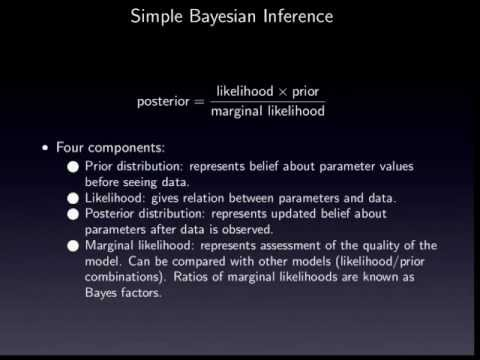

In [21]:
from datetime import timedelta
start=int(timedelta(hours=0, minutes=20, seconds=15).total_seconds())
from IPython.display import YouTubeVideo
YouTubeVideo('AvlnFnvFw_0',start=start)

## The Prior Density

Let's assume that the prior density is given by a zero mean Gaussian, which is independent across each of the parameters, 
$$\mappingVector \sim \gaussianSamp{\zerosVector}{\alpha \eye}$$
In other words, we are assuming, for the prior, that each element of the parameters vector, $\mappingScalar_i$, was drawn from a Gaussian density as follows
$$\mappingScalar_i \sim \gaussianSamp{0}{\alpha}$$

Let's start by assigning the parameter of the prior distribution, which is the variance of the prior distribution, $\alpha$.

In [22]:
# set prior variance on w
alpha = 4.
# set the order of the polynomial basis set
order = 5
# set the noise variance
sigma2 = 0.01

### Generating from the Model

A very important aspect of probabilistic modelling is to *sample* from your model to see what type of assumptions you are making about your data. In this case that involves a two stage process.

1. Sample a candiate parameter vector from the prior.
2. Place the candidate parameter vector in the likelihood and sample functions conditiond on that candidate vector.
3. Repeat to try and characterise the type of functions you are generating.

Given a prior variance (as defined above) we can now  sample from the prior distribution and combine with a basis set to see what assumptions we are making about the functions *a priori* (i.e. before we've seen the data). 

Firstly we compute the basis function matrix. We will do it both for our training data, and for a range of prediction locations (`x_pred`). 

In [23]:
import numpy as np
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']
num_data = x.shape[0]
num_pred_data = 100 # how many points to use for plotting predictions
x_pred = np.linspace(1890, 2016, num_pred_data)[:, None] # input locations for predictions

now let's build the basis matrices. We define the polynomial basis as follows.

In [24]:
def polynomial(x, degree, loc, scale):
    degrees = np.arange(degree+1)
    return ((x-loc)/scale)**degrees

In [25]:
loc = 1950.
scale = 1.
degree = 5. 
Phi_pred = polynomial(x_pred, degree=degree, loc=loc, scale=scale)
Phi = polynomial(x, degree=degree, loc=loc, scale=scale)

## Sampling from the Prior

Now we will sample from the prior to produce a vector $\mappingVector$ and use it to plot a function which is representative of our belief *before* we fit the data. To do this we are going to use the properties of the Gaussian density and a sample from a *standard normal* using the function `np.random.normal`.

### Scaling Gaussian-distributed Variables

First, let's consider the case where we have one data point and one feature in our basis set. In otherwords $\mappingFunctionVector$ would be a scalar, $\mappingVector$ would be a scalar and $\basisMatrix$ would be a scalar. In this case we have 

$$\mappingFunctionScalar = \basisScalar \mappingScalar$$

If $\mappingScalar$ is drawn from a normal density, 

$$\mappingScalar \sim \gaussianSamp{\meanScalar_\mappingScalar}{c_\mappingScalar}$$

and $\basisScalar$ is a scalar value which we are given, then properties of the Gaussian density tell us that 

$$\basisScalar \mappingScalar \sim \gaussianSamp{\basisScalar\meanScalar_\mappingScalar}{\basisScalar^2c_\mappingScalar}$$

Let's test this out numerically. First we will draw 200 samples from a standard normal,

In [26]:
w_vec = np.random.normal(size=200)

We can compute the mean of these samples and their variance

In [27]:
print('w sample mean is ', w_vec.mean())
print('w sample variance is ', w_vec.var())

w sample mean is  -0.0426229966131
w sample variance is  1.01972904859


These are close to zero (the mean) and one (the variance) as you'd expect. Now compute the mean and variance of the scaled version,

In [28]:
phi = 7
f_vec = phi*w_vec
print('True mean should be phi*0 = 0.')
print('True variance should be phi*phi*1 = ', phi*phi)
print('f sample mean is ', f_vec.mean())
print('f sample variance is ', f_vec.var())

True mean should be phi*0 = 0.
True variance should be phi*phi*1 =  49
f sample mean is  -0.298360976292
f sample variance is  49.9667233811


If you increase the number of samples then you will see that the sample mean and the sample variance begin to converge towards the true mean and the true variance. Obviously adding an offset to a sample from `np.random.normal` will change the mean. So if you want to sample from a Gaussian with mean `mu` and standard deviation `sigma` one way of doing it is to sample from the standard normal and scale and shift the result, so to sample a set of $\mappingScalar$ from a Gaussian with mean $\meanScalar$ and variance $\alpha$,

$$w \sim \gaussianSamp{\meanScalar}{\alpha}$$

We can simply scale and offset samples from the *standard normal*.

In [29]:
mu = 4 # mean of the distribution
alpha = 2 # variance of the distribution
w_vec = np.random.normal(size=200)*np.sqrt(alpha) + mu
print('w sample mean is ', w_vec.mean())
print('w sample variance is ', w_vec.var())

w sample mean is  3.78828167929
w sample variance is  1.83546650069


Here the `np.sqrt` is necesssary because we need to multiply by the standard deviation and we specified the variance as `alpha`. So scaling and offsetting a Gaussian distributed variable keeps the variable Gaussian, but it effects the mean and variance of the resulting variable. 

To get an idea of the overal shape of the resulting distribution, let's do the same thing with a histogram of the results. 

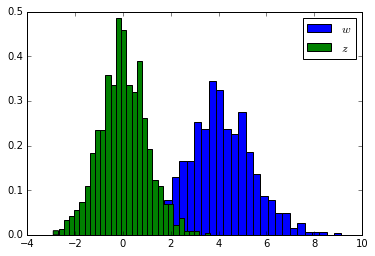

In [30]:
# First the standard normal
import matplotlib.pyplot as plt
%matplotlib inline
z_vec = np.random.normal(size=1000) # by convention, in statistics, z is often used to denote samples from the standard normal
w_vec = z_vec*np.sqrt(alpha) + mu
# plot normalized histogram of w, and then normalized histogram of z on top
plt.hist(w_vec, bins=30, normed=True)
plt.hist(z_vec, bins=30, normed=True)
plt.legend(('$w$', '$z$'))

Now re-run this histogram with 100,000 samples and check that the both histograms look qualitatively Gaussian.

## Sampling from the Prior

Let's use this way of constructing samples from a Gaussian to check what functions look like *a priori*. The process will be as follows. First, we sample a random vector $K$ dimensional from `np.random.normal`. Then we scale it by $\sqrt{\alpha}$ to obtain a prior sample of $\mappingVector$.  

In [31]:
K = degree + 1
z_vec = np.random.normal(size=K)
w_sample = z_vec*np.sqrt(alpha)
print(w_sample)

[ 0.8447706  -0.54260556 -0.33833323  0.60560828 -0.18755161 -0.57988448]


/Users/gmyrianthous/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


Now we can combine our sample from the prior with the basis functions to create a function,

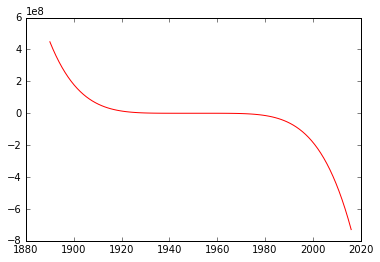

In [32]:
f_sample = np.dot(Phi_pred,w_sample)
plt.plot(x_pred.flatten(), f_sample.flatten(), 'r-')

This shows the recurring problem with the polynomial basis. Our prior allows relatively large coefficients for the basis associated with high polynomial degrees. Because we are operating with input values of around 2000, this leads to output functions of very high values. The fix we have used for this before is to rescale our data before we apply the polynomial basis to it. Above, we set the scale of the basis to 1. Here let's set it to 100 and try again.

In [33]:
scale = 100.
Phi_pred = polynomial(x_pred, degree=degree, loc=loc, scale=scale)
Phi = polynomial(x, degree=degree, loc=loc, scale=scale)

Now we need to recompute the basis functions from above, 

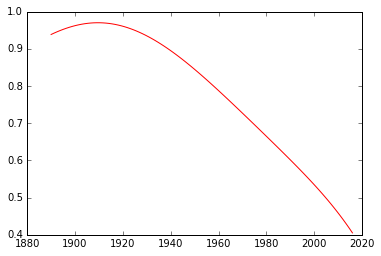

In [34]:
f_sample = np.dot(Phi_pred,w_sample)
plt.plot(x_pred.flatten(), f_sample.flatten(), 'r-')

Now let's loop through some samples and plot various functions as samples from this system,

/Users/gmyrianthous/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


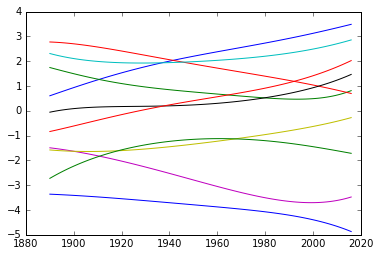

In [35]:
num_samples = 10
K = degree+1
for i in range(num_samples):
    z_vec = np.random.normal(size=K)
    w_sample = z_vec*np.sqrt(alpha)
    f_sample = np.dot(Phi_pred,w_sample)
    plt.plot(x_pred.flatten(), f_sample.flatten())

The predictions for the mean output can now be computed. We want the expected value of the predictions under the posterior distribution. In matrix form, the predictions can be computed as

$$\mathbf{f} = \basisMatrix \mappingVector.$$

This involves a matrix multiplication between a fixed matrix $\basisMatrix$ and a vector that is drawn from a distribution $\mappingVector$. Because $\mappingVector$ is drawn from a distribution, this imples that $\mappingFunctionVector$ should also be drawn from a distribution. There are two distributions we are interested in though. We have just been sampling from the *prior* distribution to see what sort of functions we get *before* looking at the data. In Bayesian inference, we need to computer the *posterior* distribution and sample from that density.

## Computing the Posterior

We will now attampt to compute the *posterior distribution*. In the lecture we went through the maths that allows us to compute the posterior distribution for $\mappingVector$. This distribution is also Gaussian,

$$p(\mappingVector | \dataVector, \inputVector, \dataStd^2) = \mathcal{N}\left(\mappingVector|\meanVector_\mappingScalar, \covarianceMatrix_\mappingScalar\right)$$

with covariance, $\covarianceMatrix_\mappingScalar$, given by

$$\covarianceMatrix_\mappingScalar = \left(\dataStd^{-2}\basisMatrix^\top \basisMatrix + \alpha^{-1} \eye\right)^{-1}$$ 

whilst the mean is given by

$$\meanVector_\mappingScalar = \covarianceMatrix_\mappingScalar \dataStd^{-2}\basisMatrix^\top \dataVector$$

Let's compute the posterior covariance and mean, then we'll sample from these densities to have a look at the posterior belief about $\mappingVector$ once the data has been accounted for. Remember, the process of Bayesian inference involves combining the prior, $p(\mappingVector)$ with the likelihood, $p(\dataVector|\inputVector, \mappingVector)$ to form the posterior, $p(\mappingVector | \dataVector, \inputVector)$ through Bayes' rule,

$$p(\mappingVector|\dataVector, \inputVector) = \frac{p(\dataVector|\inputVector, \mappingVector)p(\mappingVector)}{p(\dataVector)}$$

We've looked at the samples for our function $\mappingFunctionVector = \basisMatrix\mappingVector$, which forms the mean of the Gaussian likelihood, under the prior distribution. I.e. we've sampled from $p(\mappingVector)$ and multiplied the result by the basis matrix. Now we will sample from the posterior density, $p(\mappingVector|\dataVector, \inputVector)$, and check that the new samples fit do correspond to the data, i.e. we want to check that the updated distribution includes information from the data set. First we need to compute the posterior mean and *covariance*.

### Bayesian Inference in the Univariate Case

This video talks about Bayesian inference across the single parameter, the offset $c$, illustrating how the prior and the likelihood combine in one dimension to form a posterior.

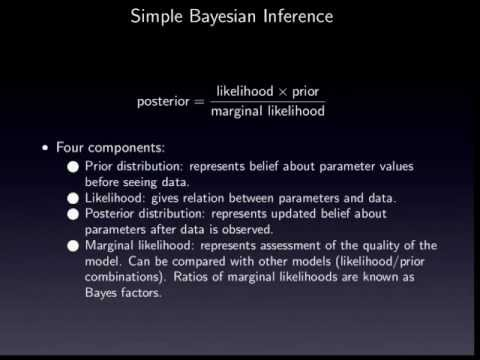

In [36]:
from datetime import timedelta
start=int(timedelta(hours=0, minutes=0, seconds=15).total_seconds())
YouTubeVideo('AvlnFnvFw_0',start=start)

### Multivariate Bayesian Inference

This section of the lecture talks about how we extend the idea of Bayesian inference for the multivariate case. It goes through the multivariate Gaussian and how to complete the square in the linear algebra as we managed below.

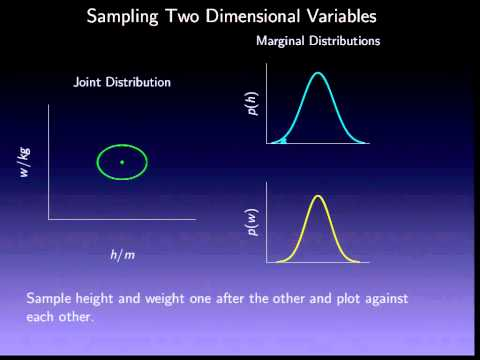

In [37]:
start=int(timedelta(hours=0, minutes=22, seconds=42).total_seconds())
YouTubeVideo('Os1iqgpelPw', start=start)

The lecture informs us the the posterior density for $\mathbf{w}$ is given by a Gaussian density with covariance
$$
\mathbf{C}_w = \left(\sigma^{-2}\boldsymbol{\Phi}^\top \boldsymbol{\Phi} + \alpha^{-1} \mathbf{I}\right)^{-1}
$$
and mean 
$$
\boldsymbol{\mu}_w = \mathbf{C}_w\sigma^{-2}\boldsymbol{\Phi}^\top \mathbf{y}.
$$

### Assignment Question 1

Compute the covariance for $\mathbf{w}$ given the training data, call the resulting variable `w_cov`. Compute the mean for $\mathbf{w}$ given the training data. Call the resulting variable `w_mean`. Assume that $\sigma^2 = 0.01$. Print out `w_cov` and `w_mean`.

*5 marks*

In [38]:
# Question 1 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.

sigma2 = 0.01 
w_cov = np.linalg.inv(1 / sigma2 * np.dot(Phi.T, Phi) + 1 / alpha * np.eye(degree + 1))
w_mean = np.dot(w_cov, 1 / sigma2 * np.dot(Phi.T, y))

print("Covariance for w: ", w_cov)
print("Mean of w: ", w_mean)

Covariance for w:  [[  1.06158704e-03  -4.37446768e-04  -8.35935773e-03   1.87263818e-03
    1.32164027e-02   3.16540437e-04]
 [ -4.37446768e-04   1.75689126e-02  -1.45601515e-03  -7.63863784e-02
    2.29425479e-02   3.09579142e-02]
 [ -8.35935773e-03  -1.45601515e-03   1.47248898e-01   5.70950610e-03
   -3.71821930e-01   2.39522296e-02]
 [  1.87263818e-03  -7.63863784e-02   5.70950610e-03   5.06516468e-01
   -1.12213516e-01  -5.65783208e-01]
 [  1.32164027e-02   2.29425479e-02  -3.71821930e-01  -1.12213516e-01
    1.24899898e+00  -1.84517863e-01]
 [  3.16540437e-04   3.09579142e-02   2.39522296e-02  -5.65783208e-01
   -1.84517863e-01   1.66648152e+00]]
Mean of w:  [[ 3.37086868]
 [-1.12665201]
 [ 1.60316386]
 [-1.32383453]
 [ 0.54615018]
 [-0.14329519]]


/Users/gmyrianthous/anaconda/lib/python3.5/site-packages/numpy/lib/twodim_base.py:233: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m = zeros((N, M), dtype=dtype)
/Users/gmyrianthous/anaconda/lib/python3.5/site-packages/numpy/lib/twodim_base.py:240: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m[:M-k].flat[i::M+1] = 1


### Sampling from the Posterior

Before we were able to sample the prior values for the mean *independently* from a Gaussian using `np.random.normal` and scaling the result. However, observing the data *correlates* the parameters. Recall this from the first lab where we had a correlation between the offset, $c$ and the slope $m$ which caused such problems with the coordinate ascent algorithm. We need to sample from a *correlated* Gaussian. For this we can use `np.random.multivariate_normal`.

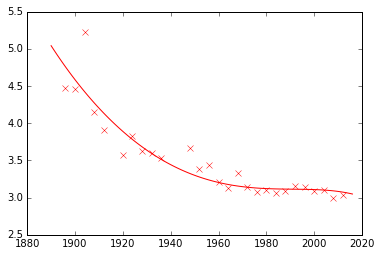

In [39]:
w_sample = np.random.multivariate_normal(w_mean.flatten(), w_cov)
f_sample = np.dot(Phi_pred,w_sample)
plt.plot(x_pred.flatten(), f_sample.flatten(), 'r-')
plt.plot(x, y, 'rx') # plot data to show fit.

Now let's sample several functions and plot them all to see how the predictions fluctuate.

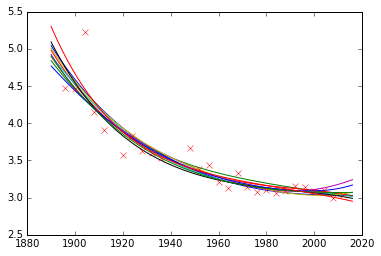

In [40]:
for i in range(num_samples):
    w_sample = np.random.multivariate_normal(w_mean.flatten(), w_cov)
    f_sample = np.dot(Phi_pred,w_sample)
    plt.plot(x_pred.flatten(), f_sample.flatten())
plt.plot(x, y, 'rx') # plot data to show fit.

This gives us an idea of what our predictions are. These are the predictions that are consistent with data and our prior. Try plotting different numbers of predictions. You can also try plotting beyond the range of where the data is and see what the functions do there. 

Rather than sampling from the posterior each time to compute our predictions, it might be better if we just summarised the predictions by the expected value of the output funciton, $f(x)$, for any particular input. If we can get formulae for this we don't need to sample the values of $f(x)$ we might be able to compute the distribution directly. Fortunately, in the Gaussian case, we can use properties of multivariate Gaussians to compute both the mean and the variance of these samples.

## Properties of Gaussian Variables

Gaussian variables have very particular properties, that many other densities don't exhibit. Perhaps foremost amoungst them is that the sum of any Gaussian distributed set of random variables also turns out to be Gaussian distributed. This property is much rarer than you might expect.

### Sum of Gaussian-distributed Variables

The sum of Gaussian random variables is also Gaussian, so if we have a random variable $y_i$ drawn from a Gaussian density with mean $\meanScalar_i$ and variance $\dataStd^2_i$, 

$$y_i \sim \gaussianSamp{\meanScalar_i}{\dataStd^2_i}$$

Then the sum of $K$ independently sampled values of $y_i$ will be drawn from a Gaussian with mean $\sum_{i=1}^K \mu_i$ and variance $\sum_{i=1}^K \dataStd_i^2$,


$$\sum_{i=1}^K y_i \sim \gaussianSamp{\sum_{i=1}^K \meanScalar_i}{\sum_{i=1}^K \dataStd_i^2}.$$

Let's try that experimentally. First let's generate a vector of samples from a standard normal distribution, $z \sim \gaussianSamp{0}{1}$,  then we will scale and offset them, then keep adding them into a vector `y_vec`.

#### Sampling from Gaussians and Summing Up

In [41]:
K = 10 # how many Gaussians to add.
num_samples = 1000 # how many samples to have in y_vec
mus = np.linspace(0, 5, K) # mean values generated linearly spaced between 0 and 5
sigmas = np.linspace(0.5, 2, K) # sigmas generated linearly spaced between 0.5 and 2
y_vec = np.zeros(num_samples)
for mu, sigma in zip(mus, sigmas):
    z_vec = np.random.normal(size=num_samples) # z is from standard normal
    y_vec += z_vec*sigma + mu # add to y z*sigma + mu

# now y_vec is the sum of each scaled and off set z.
print('Sample mean is ', y_vec.mean(), ' and sample variance is ', y_vec.var())
print('True mean should be ', mus.sum())
print('True variance should be ', (sigmas**2).sum(), ' standard deviation ', np.sqrt((sigmas**2).sum())) 

Sample mean is  24.9824014404  and sample variance is  17.1618326061
True mean should be  25.0
True variance should be  17.9166666667  standard deviation  4.2328083664


Of course, we can histogram `y_vec` as well.

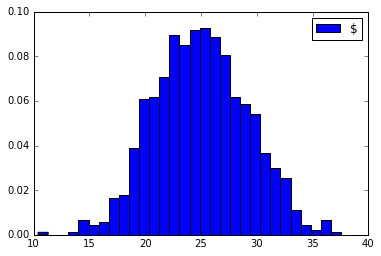

In [42]:
plt.hist(y_vec, bins=30, normed=True)
plt.legend('$y$')

### Matrix Multiplication of Gaussian Variables

We are interested in what our model is saying about the sort of functions we are observing. The fact that summing of Gaussian variables leads to new Gaussian variables, and scaling of Gaussian variables *also* leads to Gaussian variables means that matrix multiplication (which is just a series of sums and scales) also leads to Gaussian densities. Matrix multiplication is just adding and scaling together, in the formula, $\mappingFunctionVector = \basisMatrix \mappingVector$ we can extract the first element from $\mappingFunctionVector$ as

$$\mappingFunctionScalar_i = \basisVector_i^\top \mappingVector$$

where $\basisVector$ is a column vector from the $i$th row of $\basisMatrix$ and $\mappingFunctionScalar_i$ is the $i$th element of $\mappingFunctionVector$. This vector inner product itself merely implies that 

$$\mappingFunctionScalar_i = \sum_{j=1}^K \mappingScalar_j \basisScalar_{i, j}$$

and if we now say that $\mappingScalar_i$ is Gaussian distributed, then because a scaled Gaussian is also Gaussian, and because a sum of Gaussians is also Gaussian, we know that $\mappingFunctionScalar_i$ is also Gaussian distributed. It merely remains to work out its mean and covariance. We can do this by looking at the expectation under a Gaussian distribution. The expectation of the mean vector is given by

$$\expDist{\mappingFunctionVector}{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}} = \int \mappingFunctionVector \gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix} \text{d}\mappingVector = \int \basisMatrix\mappingVector \gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix} \text{d}\mappingVector = \basisMatrix \int \mappingVector \gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix} \text{d}\mappingVector = \basisMatrix \meanVector$$

Which is straightforward. The expectation of $\mappingFunctionVector=\basisMatrix\mappingVector$ under the Gaussian distribution for $\mappingFunctionVector$ is simply $\mappingFunctionVector=\basisMatrix\meanVector$, where $\meanVector$ is the *mean* of the Gaussian density for $\mappingVector$. Because our prior distribution was Gaussian with zero mean, the expectation under the prior is given by

$$\expDist{\mappingFunctionVector}{\gaussianDist{\mappingVector}{\zerosVector}{\alpha\eye}} = \zerosVector$$

The covariance is a little more complicated. A covariance matrix is defined as

$$\text{cov}\left(\mappingFunctionVector\right)_{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}} = \expDist{\mappingFunctionVector\mappingFunctionVector^\top}{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}} - \expDist{\mappingFunctionVector}{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}}\expDist{\mappingFunctionVector}{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}}^\top$$

we've already computed $\expDist{\mappingFunctionVector}{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}}=\basisMatrix \meanVector$ so we can substitute that in to recover

$$\text{cov}\left(\mappingFunctionVector\right)_{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}} = \expDist{\mappingFunctionVector\mappingFunctionVector^\top}{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}} - \basisMatrix \meanVector \meanVector^\top \basisMatrix^\top$$

So we need the expectation of $\mappingFunctionVector\mappingFunctionVector^\top$. Substituting in $\mappingFunctionVector = \basisMatrix \mappingVector$ we have

$$\text{cov}\left(\mappingFunctionVector\right)_{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}} = \expDist{\basisMatrix\mappingVector\mappingVector^\top \basisMatrix^\top}{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}} - \basisMatrix \meanVector \meanVector^\top \basisMatrix^\top$$

$$\text{cov}\left(\mappingFunctionVector\right)_{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}} = \basisMatrix\expDist{\mappingVector\mappingVector^\top}{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}} \basisMatrix^\top - \basisMatrix \meanVector \meanVector^\top \basisMatrix^\top$$

Which is dependent on the second moment of the Gaussian,

$$\expDist{\mappingVector\mappingVector^\top}{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}} = \covarianceMatrix + \meanVector\meanVector^\top$$

that can be substituted in to recover,

$$\text{cov}\left(\mappingFunctionVector\right)_{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}} = \basisMatrix\covarianceMatrix \basisMatrix^\top$$

so in the case of the prior distribution, where we have $\covarianceMatrix = \alpha \eye$ we can write

$$\text{cov}\left(\mappingFunctionVector\right)_{\gaussianDist{\mappingVector}{\zerosVector}{\alpha \eye}} = \alpha \basisMatrix \basisMatrix^\top$$

This implies that the prior we have suggested for $\mappingVector$, which is Gaussian with a mean of zero and covariance of $\alpha \eye$ suggests that the distribution for $\mappingVector$ is also Gaussian with a mean of zero and covariance of $\alpha \basisMatrix\basisMatrix^\top$. Since our observed output, $\dataVector$, is given by a noise corrupted variation of $\mappingFunctionVector$, the final distribution for $\dataVector$ is given as 

$$\dataVector = \mappingFunctionVector + \noiseVector$$

where the noise, $\noiseVector$, is sampled from a Gaussian density: $\noiseVector \sim \gaussianSamp{\zerosVector}{\dataStd^2\eye}$. So, in other words, we are taking a Gaussian distributed random value $\mappingFunctionVector$,

$$\mappingFunctionVector \sim \gaussianSamp{\zerosVector}{\alpha\basisMatrix\basisMatrix^\top}$$

and adding to it another Gaussian distributed value, $\noiseVector \sim \gaussianSamp{\zerosVector}{\dataStd^2\eye}$, to form our data observations, $\dataVector$. Once again the sum of two (multivariate) Gaussian distributed variables is also Gaussian, with a mean given by the sum of the means (both zero in this case) and the covariance given by the sum of the covariances. So we now have that the marginal likelihood for the data, $p(\dataVector)$ is given by

$$p(\dataVector) = \gaussianDist{\dataVector}{\zerosVector}{\alpha \basisMatrix \basisMatrix^\top + \dataStd^2\eye}$$

This is our *implicit* assumption for $\dataVector$ given our prior assumption for $\mappingVector$.

### Computing the Mean and Error Bars of the Functions

These ideas together, now allow us to compute the mean and error bars of the predictions. The mean prediction, before corrupting by noise is given by,
$$
\mathbf{f} = \boldsymbol{\Phi}\mathbf{w}
$$
in matrix form. This give syou enough information to compute the predictive mean. 

### Assignment Question 2

Compute the predictive mean for the function at all the values of the basis function given by `Phi_pred`. Call the vector of predictions `f_pred_mean`. Plot the predictions alongside the data. We can also compute what the training error was. Use the output from your model to compute the predictive mean, and then compute the sum of squares error of that predictive mean.
$$
E = \sum_{i=1}^n (y_i - \langle f_i\rangle)^2
$$
where $\langle f_i\rangle$ is the expected output of the model at point $x_i$.

*5 marks*

The error is:  1.08364995931


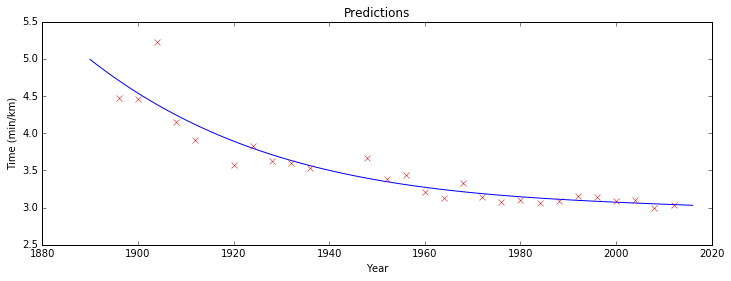

In [43]:
# Question 2 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.

# compute mean under posterior density
f_pred_mean = np.dot(Phi_pred, w_mean)

# plot the predictions
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(x_pred, f_pred_mean)
plt.plot(x, y, 'rx')
ax.set_title("Predictions")
ax.set_xlabel("Year")
ax.set_ylabel("Time (min/km)")

# compute mean at the training data and sum of squares error
f_mean = np.dot(Phi, w_mean)
sum_squares = ((y - f_mean)**2).sum()
print('The error is: ', sum_squares)

### Computing Error Bars

Finally, we can compute error bars for the predictions. The error bars are the standard deviations of the predictions for $\mappingFunctionVector=\basisMatrix\mappingVector$ under the posterior density for $\mappingVector$. The standard deviations of these predictions can be found from the variance of the prediction at each point. Those variances are the diagonal entries of the covariance matrix. We've already computed the form of the covariance under Gaussian expectations, 

$$\text{cov}\left(\mappingFunctionVector\right)_{\gaussianDist{\mappingVector}{\meanVector}{\covarianceMatrix}} = \basisMatrix\covarianceMatrix \basisMatrix^\top$$

which under the posterior density is given by

$$\text{cov}\left(\mappingFunctionVector\right)_{\gaussianDist{\mappingVector}{\meanVector_w}{\covarianceMatrix_w}} = \basisMatrix\covarianceMatrix_w \basisMatrix^\top$$

### Assignment Question 3

The error bars are given by computing the standard deviation of the predictions, $f$. For a given prediction $f_i$ the variance is $\text{var}(f_i) = \langle f_i^2\rangle - \langle f_i \rangle^2$. This is given by the diagonal element of the covariance of $\mathbf{f}$,
$$
\text{var}(f_i) = \boldsymbol{\phi}_{i, :}^\top \mathbf{C}_w \boldsymbol{\phi}_{i, :}
$$
where $\boldsymbol{\phi}_{i, :}$ is the basis vector associated with the input location, $\mathbf{x}_i$.

Plot the mean function and the error bars for your basis.

*10 marks*


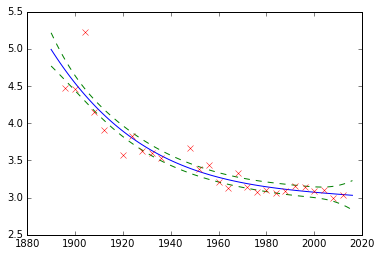

In [44]:
# Question 3 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.

# Compute variance at function values

f_pred_var = np.diag(np.dot(Phi_pred, np.dot(w_cov, Phi_pred.T)))[:, None]
f_pred_std = np.sqrt(f_pred_var)


# plot the mean and error bars at 2 standard deviations above and below the mean
plt.plot(x_pred.flatten(), f_pred_mean.flatten(), 'b-')
plt.plot(x_pred.flatten(), (f_pred_mean + 2 * f_pred_std).flatten(), 'g--')
plt.plot(x_pred.flatten(), (f_pred_mean - 2 * f_pred_std).flatten(), 'g--')
plt.plot(x, y, 'rx')

### Validation

Now we will test the generalisation ability of these models. Firstly we are going to use hold out validation to attempt to see which model is best for extrapolating.

### Assignment Question 4

Now split the data into training and *hold out* validation sets. Hold out the data for years after 1980. Compute the predictions for different model orders between 0 and 8. Find the model order which fits best according to *hold out* validation. Is it the same as the maximum likelihood result fom last week?

*15 marks*

Model order which fits better:  2
Validation error:  [ 2.80874183  1.90321365  0.28001493  0.62837149  0.48483908  0.46694108
  0.50377299  0.48776909  0.49701687]


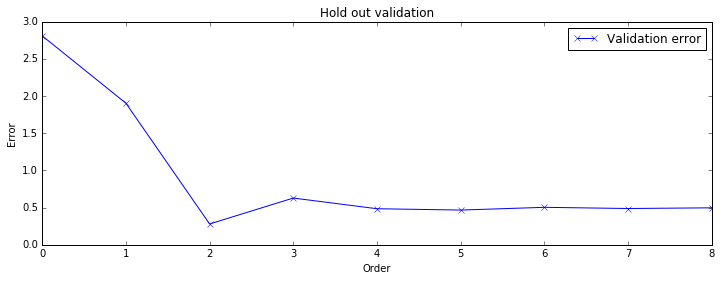

In [45]:
# Question 4 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.

import numpy as np
import scipy as sp

# select indices of data to 'hold out'
indices_hold_out = np.flatnonzero(x > 1980)

# Create a training set
x_train = np.delete(x, indices_hold_out, axis=0)
y_train = np.delete(y, indices_hold_out, axis=0)

# Create a hold out set
x_valid = np.take(x, indices_hold_out, axis=0)
y_valid = np.take(y, indices_hold_out, axis=0)

max_basis = 8
sigma2 = 0.01
alpha = 4.
loc = 1950.
scale = 100.

# Initialise data structures
validation_err_ho = np.zeros(max_basis + 1)
training_err_ho = np.zeros(max_basis + 1)


for degree in range(max_basis + 1):
    Phi = polynomial(x_train, degree = degree, loc = loc, scale = scale)
    w_cov = np.linalg.inv(1 / sigma2 * np.dot(Phi.T, Phi) + 1 / alpha * np.eye(degree + 1))
    w_mean = np.dot(w_cov, 1 / sigma2 * np.dot(Phi.T, y_train))
    f_mean = np.dot(Phi, w_mean) 
    training_err_ho[degree] = ((y_train - f_mean)**2).sum()

    Phi = polynomial(x_valid, degree = degree, loc = loc, scale = scale)
    f_pred_mean = np.dot(Phi, w_mean)
    validation_err_ho[degree] = ((y_valid - f_pred_mean)**2).sum()
    
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(validation_err_ho, "-bx", label = "Validation error")
ax.set_title("Hold out validation")
plt.legend()
ax.set_xlabel("Order")
ax.set_ylabel("Error")
print("Model order which fits better: ", np.argmin(validation_err_ho))
print("Validation error: ", validation_err_ho)

#### Question 4 Answer

No, it is not the same as the maximum likelihood result from last week. The model which fits better is the one with order = 2. Furthermore, compared to the Hold-out validation that was performed last week, we can see that as the order increases, the validation error decreases (except the error between $\textit{order = 2}$  and $\textit{order = 3}$. The corresponding plot from last week, shows that as the order increases, the validation error is also increased. 

### Assignment Question 5

Now we will use leave one out cross validation to attempt to see which model is best at interpolating. Do you get the same result as for hold out validation? Compare plots of the hold out validation area for different degrees and the cross validation error for different degrees. Why are they so different? Select a suitable polynomial for characterising the differences in the predictions. Plot the mean function and the error bars for the full data set (to represent the leave one out solution) and the training data from the hold out experiment. Discuss your answer. 

*15 marks*

Model order which fits better:  8
Model with the less training error:  8
Validation error:  [  2.35184706e-01   8.58271027e-02   1.36764372e-02   1.80096496e-04
   1.43038133e-04   1.97271952e-04   5.94660890e-05   1.02470200e-04
   5.64473381e-05]
Training error:  [ 7.49518217  1.90497587  1.14012645  1.08406722  1.08183338  1.08150159
  1.08028424  1.07990508  1.07931605]


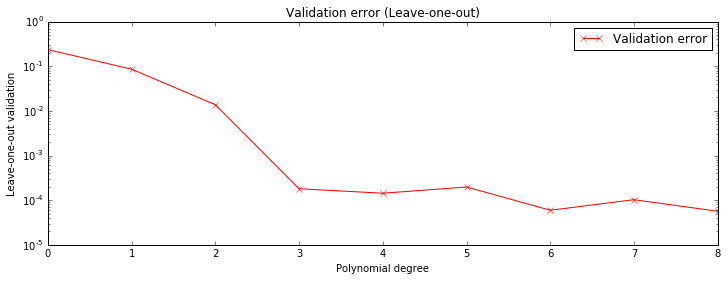

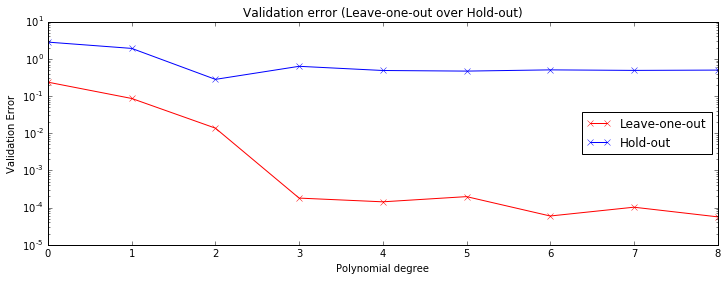

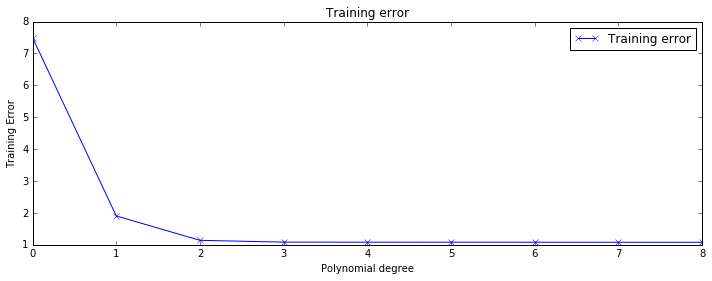

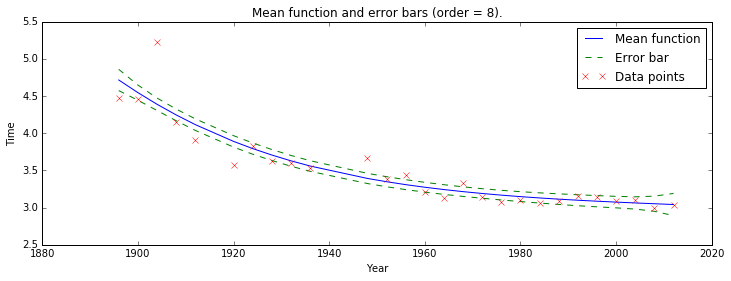

In [46]:
# Question 5 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.

def leave_one_out(x, y, indices_hold_out):
    # Create a training set
    x_train = np.delete(x, indices_hold_out, axis = 0)
    y_train = np.delete(y, indices_hold_out, axis = 0)

    # Create a hold out set
    x_valid = np.take(x, indices_hold_out, axis = 0)
    y_valid = np.take(y, indices_hold_out, axis = 0)
    
    return x_valid, y_valid, x_train, y_train

f_pred_mean = np.zeros(max_basis + 1)
validation_err_loo = np.zeros(max_basis + 1)
training_err_loo = np.zeros(max_basis + 1)
n = x.shape[0]

# Calculate leave-one-out
for degree in range (max_basis + 1):
    for j in range(n):
        # Get validation and training data. 
        x_valid, y_valid, x_train, y_train = leave_one_out(x, y, j)
        
        Phi = polynomial(x_train, degree = degree, loc = loc, scale = scale)
        w_cov = np.linalg.inv(1 / sigma2 * np.dot(Phi.T, Phi) + 1 / alpha * np.eye(degree + 1))
        w_mean = np.dot(w_cov, 1 / sigma2 * np.dot(Phi.T, y_train))
        f_mean = np.dot(Phi, w_mean) 
        training_err_loo[degree] = ((y_train - f_mean)**2).sum()

        Phi_pred = polynomial(x_valid, degree = degree, loc = loc, scale = scale)
        f_pred_mean[degree] = np.dot(Phi_pred, w_mean)
        validation_err_loo[degree] = ((y_valid - f_pred_mean[degree])**2).sum()

# Print Validation-Training error and model that fits better
print("Model order which fits better: ", np.argmin(validation_err_loo))
print("Model with the less training error: ", np.argmin(training_err_loo))
print("Validation error: ", validation_err_loo)
print("Training error: ", training_err_loo)

# Calculate the mean function and error bars for the best LOO model found for the entire dataset.        
best_order = np.argmin(validation_err_loo)
Phi_best = polynomial(x, degree = best_order, loc = loc, scale = scale)
w_cov_best = np.linalg.inv(1 / sigma2 * np.dot(Phi_best.T, Phi_best) + 1 / alpha * np.eye(best_order + 1))
w_mean_best = np.dot(w_cov_best, 1 / sigma2 * np.dot(Phi_best.T, y))
f_pred_mean_best = np.dot(Phi_best, w_mean)
# Calculate the error bars.
f_pred_var_best = np.diag(np.dot(Phi_best, np.dot(w_cov_best, Phi_best.T)))[:, None]
f_pred_std_best = np.sqrt(f_pred_var_best) 


############## PLOTS ##############
# Plot the Leave-one-out validation
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(np.arange(max_basis + 1), validation_err_loo, 'rx-', label = "Validation error")
ax.set_yscale('log')
plt.legend(loc="upper right")
plt.xlabel("Polynomial degree")
plt.ylabel("Leave-one-out validation")
plt.title("Validation error (Leave-one-out)")

# Plot Leave-one-out against Hold out
fig2, ax2 = plt.subplots(figsize=(12, 4))
plt.plot(np.arange(max_basis + 1), validation_err_loo, 'rx-', label = "Leave-one-out")
plt.plot(np.arange(max_basis + 1), validation_err_ho, 'bx-', label = "Hold-out")
ax.set_yscale('log')
plt.legend(loc="center right")
plt.xlabel("Polynomial degree")
plt.ylabel("Validation Error")
plt.title("Validation error (Leave-one-out over Hold-out)")

# Plot the training error
fig3, ax3 = plt.subplots(figsize=(12, 4))
plt.plot(np.arange(max_basis + 1), training_err_loo, 'bx-', label = "Training error")
ax2.set_yscale('log')
plt.legend(loc="upper right")
plt.xlabel("Polynomial degree")
plt.ylabel("Training Error")
plt.title("Training error")

# Plot the mean function with the error bars. 
fig4, ax4 = plt.subplots(figsize=(12, 4))
plt.plot(x.flatten(), f_pred_mean_best.flatten(), 'b-', label = "Mean function")
plt.plot(x.flatten(), (f_pred_mean_best + 2 * f_pred_std_best).flatten(), 'g--', label = "Error bar")
plt.plot(x.flatten(), (f_pred_mean_best - 2 * f_pred_std_best).flatten(), 'g--')
plt.plot(x, y, 'rx', label = "Data points")
plt.legend(loc="upper right")
plt.xlabel("Year")
plt.ylabel("Time")
plt.title("Mean function and error bars (order = " + str(best_order) + ").")

#### Question 5 Answer

No, the results between hold-out validation and leave-one-out validation are not the same. They do have many differeneces. This is because in the hold-out validation we select a part of the data to be used in the training phase, while the rest of the dataset is being used in order for the validation of the model. On the other hand, using leave-one-out validation, each time we select exactly one data point to be left out from the training phase. This particular data point is then used in the validation phase. By the end of the iterations, all the data points will be used exactly once for the validation (every time exactly one data point is selected). We can clearly see that Leave-on-out validation, produces less error in general rather than Hold-out validation. However, LOO validation is suitable in cases where we don't have many data points (many data points -> n iterations to perform LOO)

It is worth mentioning that the model with the less validation error using Hold-out validation is the model with order 2. On the other hand, the model with the less validation error using Leave-one-out validation is the model with polynomial order equal to 8. 

Finlly, the mean function and the error bars of the prediction are computed and plotted (for the model with order that produces the less validation LOO error and for the whole dataset). These bars represent the standard deviations of the predictions. 